In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/base/base/Vib_acpi_800_train.csv', header=None)
Data1b = pd.read_csv('/content/drive/MyDrive/base/base/Vib_acpi_800_train1B.csv', header=None)
Data2b = pd.read_csv('/content/drive/MyDrive/base/base/Vib_acpi_800_train2B.csv', header=None)
Data3b = pd.read_csv('/content/drive/MyDrive/base/base/Vib_acpi_800_train3B.csv', header=None)
Data4b = pd.read_csv('/content/drive/MyDrive/base/base/Vib_acpi_800_train4B.csv', header=None)
print('Info de la base')
Data.info()
print('Info de la base1')
Data1b.info()
print('Info de la base2')
Data2b.info()
print('Info de la base3')
Data3b.info()
print('Info de la base4')
Data4b.info()

Info de la base
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 800 entries, 0 to 799
dtypes: float64(800)
memory usage: 48.8 MB
Info de la base1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 800 entries, 0 to 799
dtypes: float64(800)
memory usage: 48.8 MB
Info de la base2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 800 entries, 0 to 799
dtypes: float64(800)
memory usage: 48.8 MB
Info de la base3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 800 entries, 0 to 799
dtypes: float64(800)
memory usage: 48.8 MB
Info de la base4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 800 entries, 0 to 799
dtypes: float64(800)
memory usage: 48.8 MB


In [ ]:
Data

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-8.5785,-8.2703,-7.9681,-7.6172,-7.2601,-6.9061,-6.5552,-6.2469,-5.9204,-5.5267,...,-2.3499,-1.9745,-1.6205,-1.2238,-0.76904,-0.31433,0.088501,0.44861,0.74768,1.1078
1,1.5198,2.0050,2.4536,2.7771,3.0762,3.3539,3.6591,4.0039,4.3732,4.6875,...,7.6996,7.9254,8.1024,8.2092,8.25200,8.26110,8.261100,8.25200,8.28250,8.2642
2,8.2245,8.1207,7.9529,7.8156,7.7606,7.6508,7.4615,7.2052,6.9550,6.7810,...,5.0598,4.9469,4.8187,4.7119,4.60820,4.55020,4.434200,4.36100,4.23280,4.1504
3,4.0924,4.1107,4.1412,4.1168,4.0558,4.0436,4.0955,4.1779,4.2542,4.2969,...,4.4250,4.5044,4.5807,4.6234,4.60510,4.54410,4.556300,4.58070,4.69060,4.7943
4,4.8553,4.8218,4.7211,4.6906,4.7638,4.8859,4.9316,4.9408,4.8431,4.7974,...,5.8685,5.9723,6.0272,5.9814,5.88680,5.80440,5.777000,5.78920,5.75870,5.5969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.6907,-1.7426,-1.7975,-1.8799,-2.0233,-2.2247,-2.3590,-2.3865,-2.4109,-2.5116,...,-1.1047,-1.2787,-1.4069,-1.4557,-1.55030,-1.70590,-1.922600,-2.08440,-2.11790,-2.1423
7996,-2.2400,-2.3712,-2.4750,-2.6062,-2.6764,-2.7588,-2.8473,-2.9663,-3.0548,-3.1952,...,-1.0071,-1.0498,-1.1200,-1.1505,-1.15660,-1.15050,-1.162700,-1.27560,-1.35800,-1.4099
7997,-1.4648,-1.4954,-1.5717,-1.7273,-1.8860,-1.9623,-1.9775,-2.0386,-2.2064,-2.4048,...,-1.5106,-1.5656,-1.6144,-1.7395,-1.95310,-2.16670,-2.249100,-2.32240,-2.37120,-2.4384
7998,-2.5970,-2.7924,-2.9083,-2.9572,-2.9572,-3.0273,-3.1525,-3.3051,-3.4149,-3.4973,...,-1.5259,-1.6266,-1.6693,-1.6846,-1.70900,-1.73950,-1.806600,-1.93180,-1.99890,-2.0660


In [ ]:
Data1b.isnull().values.sum()

0

In [ ]:
Data2b.isnull().values.sum()

0

In [ ]:
Data3b.isnull().values.sum()

0

In [ ]:
Data4b.isnull().values.sum()

0

In [ ]:
Data.isnull().values.sum()

0

In [ ]:
Data.describe()



,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.285184,0.284773,0.285075,0.285504,0.285296,0.284986,0.283750,0.282366,0.280625,0.279925,...,0.284253,0.286190,0.287828,0.289148,0.289538,0.289916,0.290850,0.291346,0.291641,0.291253
std,5.378362,5.378824,5.378818,5.378637,5.378625,5.379116,5.380053,5.380668,5.381026,5.381522,...,5.377839,5.377524,5.377904,5.377934,5.377999,5.378402,5.378583,5.378935,5.379177,5.379142
min,-15.030000,-14.911000,-14.841000,-14.774000,-14.859000,-14.908000,-14.908000,-15.054000,-15.201000,-15.314000,...,-15.231000,-15.097000,-15.002000,-15.118000,-15.173000,-15.158000,-15.213000,-15.271000,-15.201000,-15.167000
25%,-3.964200,-3.977200,-3.976400,-3.977175,-3.976400,-3.921500,-3.924600,-3.933700,-3.940575,-3.937550,...,-3.952775,-3.943650,-3.958100,-3.929125,-3.940575,-3.945900,-3.953525,-3.979500,-3.958875,-3.942900
50%,1.681500,1.718100,1.748700,1.745650,1.736450,1.734950,1.721200,1.722700,1.709000,1.718100,...,1.730350,1.730300,1.704400,1.699800,1.704400,1.696750,1.701350,1.699800,1.710500,1.701350
75%,4.861400,4.849975,4.850725,4.861400,4.834750,4.864500,4.849200,4.846200,4.870600,4.867600,...,4.904200,4.904950,4.904200,4.901100,4.885900,4.889675,4.873700,4.849200,4.871375,4.879800
max,9.436000,9.314000,9.341400,9.402500,9.463500,9.463500,9.402500,9.344500,9.298700,9.259000,...,9.408600,9.408600,9.439100,9.475700,9.487900,9.429900,9.371900,9.469600,9.521500,9.512300


In [ ]:
Data1b.describe()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.243228,0.241433,0.240002,0.239440,0.239171,0.238676,0.237809,0.236650,0.235744,0.235755,...,0.265168,0.265753,0.264598,0.261721,0.258431,0.255692,0.254403,0.254406,0.255221,0.255631
std,7.534314,7.535829,7.535952,7.534757,7.532984,7.532041,7.531851,7.531861,7.531766,7.530892,...,7.530831,7.532005,7.533603,7.534767,7.535168,7.535128,7.534154,7.533051,7.531763,7.531778
min,-16.537000,-16.617000,-16.641000,-16.559000,-16.458000,-16.394000,-16.336000,-16.193000,-15.991000,-15.756000,...,-15.787000,-15.714000,-15.817000,-15.994000,-16.013000,-16.025000,-16.177000,-16.391000,-16.507000,-16.537000
25%,-6.055450,-6.040925,-6.040175,-5.986025,-5.978400,-6.022625,-6.033300,-6.052375,-6.021100,-6.008175,...,-5.954750,-5.939475,-5.979925,-6.006625,-6.044025,-6.029500,-6.043250,-6.034075,-6.063075,-6.040925
50%,1.077300,1.107750,1.028400,1.059000,1.040600,1.033000,1.023850,0.997920,1.029950,1.016200,...,1.036050,1.026900,0.965885,0.985720,0.993345,1.026900,1.002500,0.981140,0.985720,1.040600
75%,6.098925,6.098175,6.109600,6.113450,6.106600,6.119550,6.120325,6.148500,6.151575,6.143950,...,6.073775,6.082950,6.067650,6.058475,6.058475,6.070675,6.052375,6.082950,6.092075,6.122575
max,16.605000,16.641000,16.684000,16.678000,16.595000,16.418000,16.330000,16.315000,16.473000,16.714000,...,16.928000,16.989000,16.998000,16.934000,16.907000,16.852000,16.714000,16.583000,16.568000,16.562000


In [ ]:
Data2b.describe()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.369711,0.367903,0.366405,0.364327,0.361957,0.359096,0.356096,0.352964,0.350514,0.347895,...,0.374730,0.375486,0.375488,0.375542,0.375315,0.375082,0.373983,0.372461,0.370922,0.369606
std,6.257113,6.255057,6.254084,6.253379,6.251984,6.249430,6.246569,6.244245,6.243232,6.243102,...,6.264736,6.263426,6.261885,6.260372,6.258950,6.257663,6.257005,6.255832,6.253733,6.250822
min,-15.051000,-15.009000,-14.963000,-14.896000,-14.777000,-14.816000,-14.828000,-14.774000,-14.908000,-14.987000,...,-14.920000,-14.926000,-14.847000,-14.877000,-14.941000,-15.005000,-15.036000,-15.048000,-15.067000,-15.082000
25%,-4.071000,-4.080200,-4.074850,-4.080975,-4.092400,-4.093175,-4.077100,-4.092400,-4.105375,-4.086300,...,-4.098500,-4.080200,-4.098500,-4.090150,-4.098500,-4.104600,-4.098500,-4.087075,-4.100800,-4.113800
50%,-0.538635,-0.578305,-0.573730,-0.558470,-0.546260,-0.564575,-0.573730,-0.552370,-0.570680,-0.546260,...,-0.552370,-0.563050,-0.564580,-0.558470,-0.547790,-0.558470,-0.572205,-0.576780,-0.555420,-0.531010
75%,5.026200,5.020100,4.982025,4.996475,5.007900,4.984275,5.021625,5.013275,5.017850,5.026975,...,5.056000,5.018625,5.046125,5.046125,4.972825,5.036925,5.010950,5.020100,5.007900,4.992700
max,18.542000,18.542000,18.658000,18.634000,18.625000,18.539000,18.607000,18.857000,19.031000,19.113000,...,18.945000,18.884000,18.839000,18.890000,18.845000,18.842000,18.820000,18.753000,18.637000,18.509000


In [ ]:
Data1b.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-10.5040,-10.1960,-9.82970,-9.40250,-8.9813,-8.596800,-8.24280,-7.97730,-7.77890,-7.5043,...,-4.3488,-4.0497,-3.8116,-3.5858,-3.2227,-2.7435,-2.2491,-1.9073,-1.7700,-1.6693
1,-1.4923,-1.1902,-0.83313,-0.50354,-0.2655,-0.009155,0.25024,0.53406,0.88501,1.3397,...,4.7577,5.0903,5.4749,5.8533,6.1340,6.4117,6.6650,6.8634,7.0770,7.3578
2,7.6477,7.9742,8.29470,8.52970,8.7585,9.036300,9.36890,9.67410,9.92740,10.1410,...,12.1030,12.4150,12.7170,12.8750,12.9880,13.1230,13.3420,13.5650,13.8000,14.0050
3,14.1940,14.3620,14.51700,14.67000,14.7670,14.865000,14.99600,15.06700,15.10900,15.1640,...,15.0670,14.8590,14.7250,14.6210,14.5110,14.4070,14.2940,14.1450,13.9680,13.7790
4,13.4920,13.1560,12.84200,12.51800,12.2350,11.972000,11.73400,11.49300,11.20000,10.8060,...,6.0150,5.6519,5.2856,4.8401,4.3396,3.9215,3.6194,3.3386,2.9572,2.4048


In [ ]:
Data2b.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-5.8350,-6.1096,-6.3385,-6.5765,-6.8146,-7.0953,-7.4493,-7.7850,-8.05050,-8.18790,...,-9.2346,-9.3781,-9.5673,-9.7015,-9.7443,-9.7290,-9.7046,-9.7321,-9.8419,-9.8541
1,-9.7748,-9.6436,-9.5062,-9.4391,-9.4086,-9.3658,-9.2194,-9.0546,-8.89590,-8.76160,...,-7.7026,-7.4097,-7.0343,-6.5857,-6.1829,-5.8289,-5.5084,-5.1971,-4.8370,-4.4647
2,-4.0863,-3.7476,-3.3905,-2.9755,-2.5116,-2.0691,-1.6083,-1.1200,-0.63782,-0.18311,...,4.4464,4.9774,5.5145,5.9906,6.4850,6.9977,7.5531,8.1329,8.6914,9.2285
3,9.7473,10.2450,10.7030,11.1910,11.7100,12.1920,12.6160,12.9300,13.24500,13.58900,...,15.5820,15.6950,15.7440,15.7010,15.6250,15.5910,15.5940,15.5820,15.4660,15.2160
4,14.9750,14.7130,14.4230,14.1450,13.8700,13.5680,13.1990,12.8110,12.45400,12.06400,...,7.4158,6.9397,6.4026,5.8380,5.3345,4.9194,4.5471,4.1412,3.6743,3.1830


In [ ]:
Data3b.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,7.99870,7.89490,7.7972,7.7118,7.6324,7.5684,7.4402,7.28450,7.11060,6.96720,...,4.647800,4.425000,4.14730,3.86050,3.58580,3.34170,3.11580,2.90830,2.65200,2.33150
1,2.10880,1.95920,1.8646,1.7639,1.5533,1.3214,1.1078,0.90942,0.78125,0.71716,...,0.061035,0.057983,0.11597,0.22278,0.33875,0.44556,0.51575,0.54321,0.54932,0.59204
2,0.74768,0.95215,1.0834,1.1658,1.2451,1.4343,1.6449,1.87070,2.07820,2.22470,...,4.025300,4.138200,4.26940,4.32740,4.28160,4.22060,4.22670,4.31210,4.47690,4.57150
3,4.51970,4.43730,4.3793,4.3579,4.3732,4.3549,4.2877,4.16560,4.05270,3.99480,...,2.914400,2.887000,2.76180,2.61230,2.52690,2.49330,2.48720,2.40780,2.29800,2.20340
4,2.13010,2.02940,1.9104,1.7517,1.5411,1.3672,1.2146,1.06200,0.90942,0.74768,...,-1.355000,-1.754800,-2.15450,-2.58790,-3.07010,-3.54310,-3.97640,-4.32430,-4.63870,-4.98960


In [ ]:
Data4b.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-1.9867,-2.3804,-2.8015,-3.2349,-3.6224,-3.9490,-4.1840,-4.4220,-4.7882,-5.21240,...,-6.76270,-6.96410,-7.174700,-7.44020,-7.7148,-7.97120,-8.15120,-8.28550,-8.3984,-8.5999
1,-8.8654,-9.0485,-9.1278,-9.1217,-9.1248,-9.1827,-9.3567,-9.5489,-9.6436,-9.58860,...,-10.22000,-10.34900,-10.388000,-10.34200,-10.2810,-10.17500,-10.09500,-10.12900,-10.1650,-10.1620
2,-10.0770,-9.8785,-9.6527,-9.5551,-9.5673,-9.5612,-9.4818,-9.3384,-9.1522,-8.99960,...,-7.94070,-7.81560,-7.601900,-7.32730,-7.0953,-6.98240,-6.95190,-6.88170,-6.7352,-6.5857
3,-6.4514,-6.3782,-6.3721,-6.3629,-6.3202,-6.2286,-6.0822,-5.9784,-5.8899,-5.81970,...,-3.58580,-3.35390,-3.128100,-2.93580,-2.7771,-2.67030,-2.50850,-2.28270,-2.0844,-1.9745
4,-1.9440,-1.8890,-1.8097,-1.7517,-1.6754,-1.5289,-1.3580,-1.1871,-1.0254,-0.84534,...,-0.14343,-0.11597,-0.033569,0.10071,0.2655,0.41199,0.58899,0.79651,1.0406,1.2878


In [ ]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-8.5785,-8.2703,-7.9681,-7.6172,-7.2601,-6.9061,-6.5552,-6.2469,-5.9204,-5.5267,...,-2.3499,-1.9745,-1.6205,-1.2238,-0.76904,-0.31433,0.088501,0.44861,0.74768,1.1078
1,1.5198,2.0050,2.4536,2.7771,3.0762,3.3539,3.6591,4.0039,4.3732,4.6875,...,7.6996,7.9254,8.1024,8.2092,8.25200,8.26110,8.261100,8.25200,8.28250,8.2642
2,8.2245,8.1207,7.9529,7.8156,7.7606,7.6508,7.4615,7.2052,6.9550,6.7810,...,5.0598,4.9469,4.8187,4.7119,4.60820,4.55020,4.434200,4.36100,4.23280,4.1504
3,4.0924,4.1107,4.1412,4.1168,4.0558,4.0436,4.0955,4.1779,4.2542,4.2969,...,4.4250,4.5044,4.5807,4.6234,4.60510,4.54410,4.556300,4.58070,4.69060,4.7943
4,4.8553,4.8218,4.7211,4.6906,4.7638,4.8859,4.9316,4.9408,4.8431,4.7974,...,5.8685,5.9723,6.0272,5.9814,5.88680,5.80440,5.777000,5.78920,5.75870,5.5969


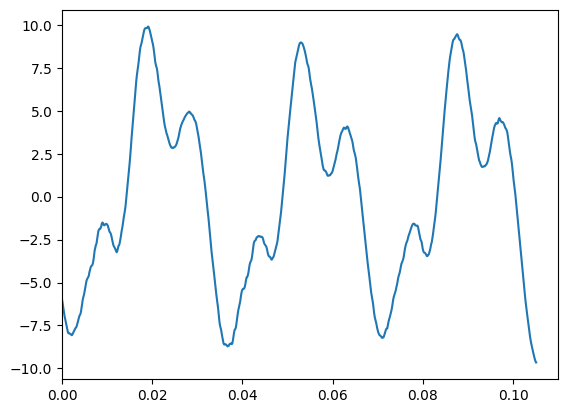

In [ ]:
t = np.arange(0,0.1051315411,0.0001315789)
ord_n = Data.loc[4100,:]
plt.plot(t,ord_n)
plt.xlim(0,0.11)
plt.show()

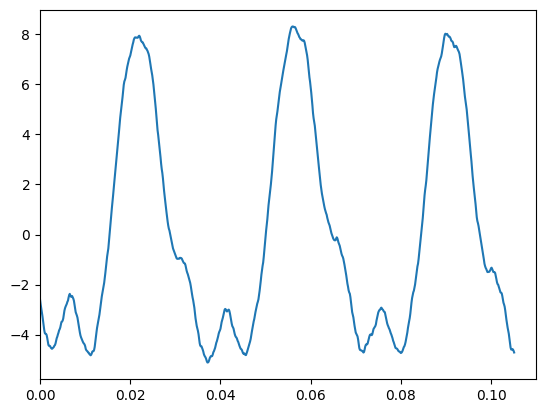

In [ ]:
t = np.arange(0,0.1051315411,0.0001315789)
ord_n = Data2b.loc[4100,:]
plt.plot(t,ord_n)
plt.xlim(0,0.11)
plt.show()

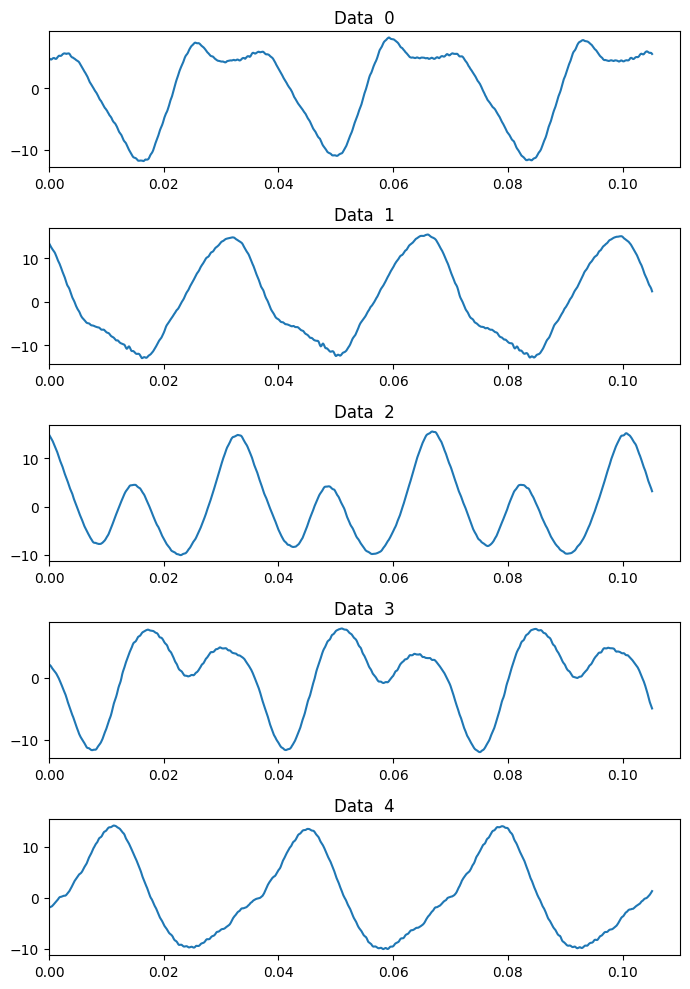

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_paths = [
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train.csv',
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train1B.csv',
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train2B.csv',
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train3B.csv',
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train4B.csv'
]
all_data = []

for file_path in file_paths:
    data = pd.read_csv(file_path, header=None)
    all_data.append(data.loc[4, :])

num_files = len(all_data)
fig, axs = plt.subplots(num_files, 1, figsize=(7, 10))

for i, Data in enumerate(all_data):
    t = np.arange(0, 0.1051315411, 0.0001315789)
    ord_n = Data
    axs[i].plot(t, ord_n)
    axs[i].set_xlim(0, 0.11)
    axs[i].set_title('Data  ' + str(i))

plt.tight_layout()
plt.show()




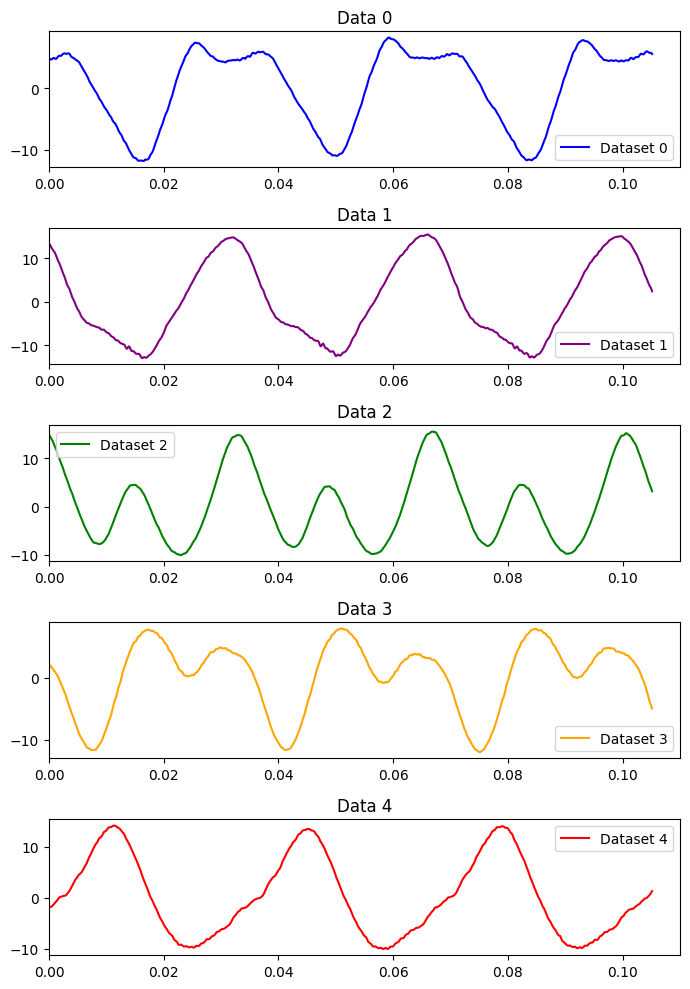

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_paths = [
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train.csv',
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train1B.csv',
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train2B.csv',
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train3B.csv',
    '/content/drive/MyDrive/base/base/Vib_acpi_800_train4B.csv'
]
all_data = []

for file_path in file_paths:
    data = pd.read_csv(file_path, header=None)
    all_data.append(data.loc[4, :])

num_files = len(all_data)
fig, axs = plt.subplots(num_files, 1, figsize=(7, 10))

# Specify colors and labels for each dataset
colors = ['blue', 'purple', 'green', 'orange', 'red']
labels = ["Dataset 0", "Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]

for i, Data in enumerate(all_data):
    t = np.arange(0, 0.1051315411, 0.0001315789)
    ord_n = Data
    axs[i].plot(t, ord_n, label=labels[i], color=colors[i])
    axs[i].set_xlim(0, 0.11)
    axs[i].set_title('Data ' + str(i))
    axs[i].legend()

plt.tight_layout()
plt.show()


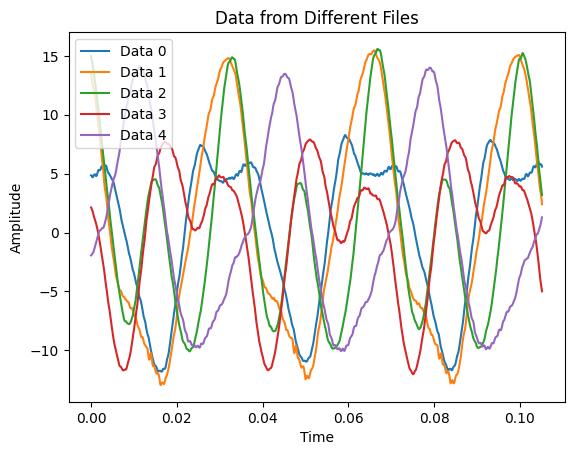

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Generate time values
t = np.arange(0, 0.1051315411, 0.0001315789)

for i, data in enumerate(all_data):
    plt.plot(t, data, label=f'Data {i}')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Data from Different Files')
plt.legend()

# Display the plot
plt.show()


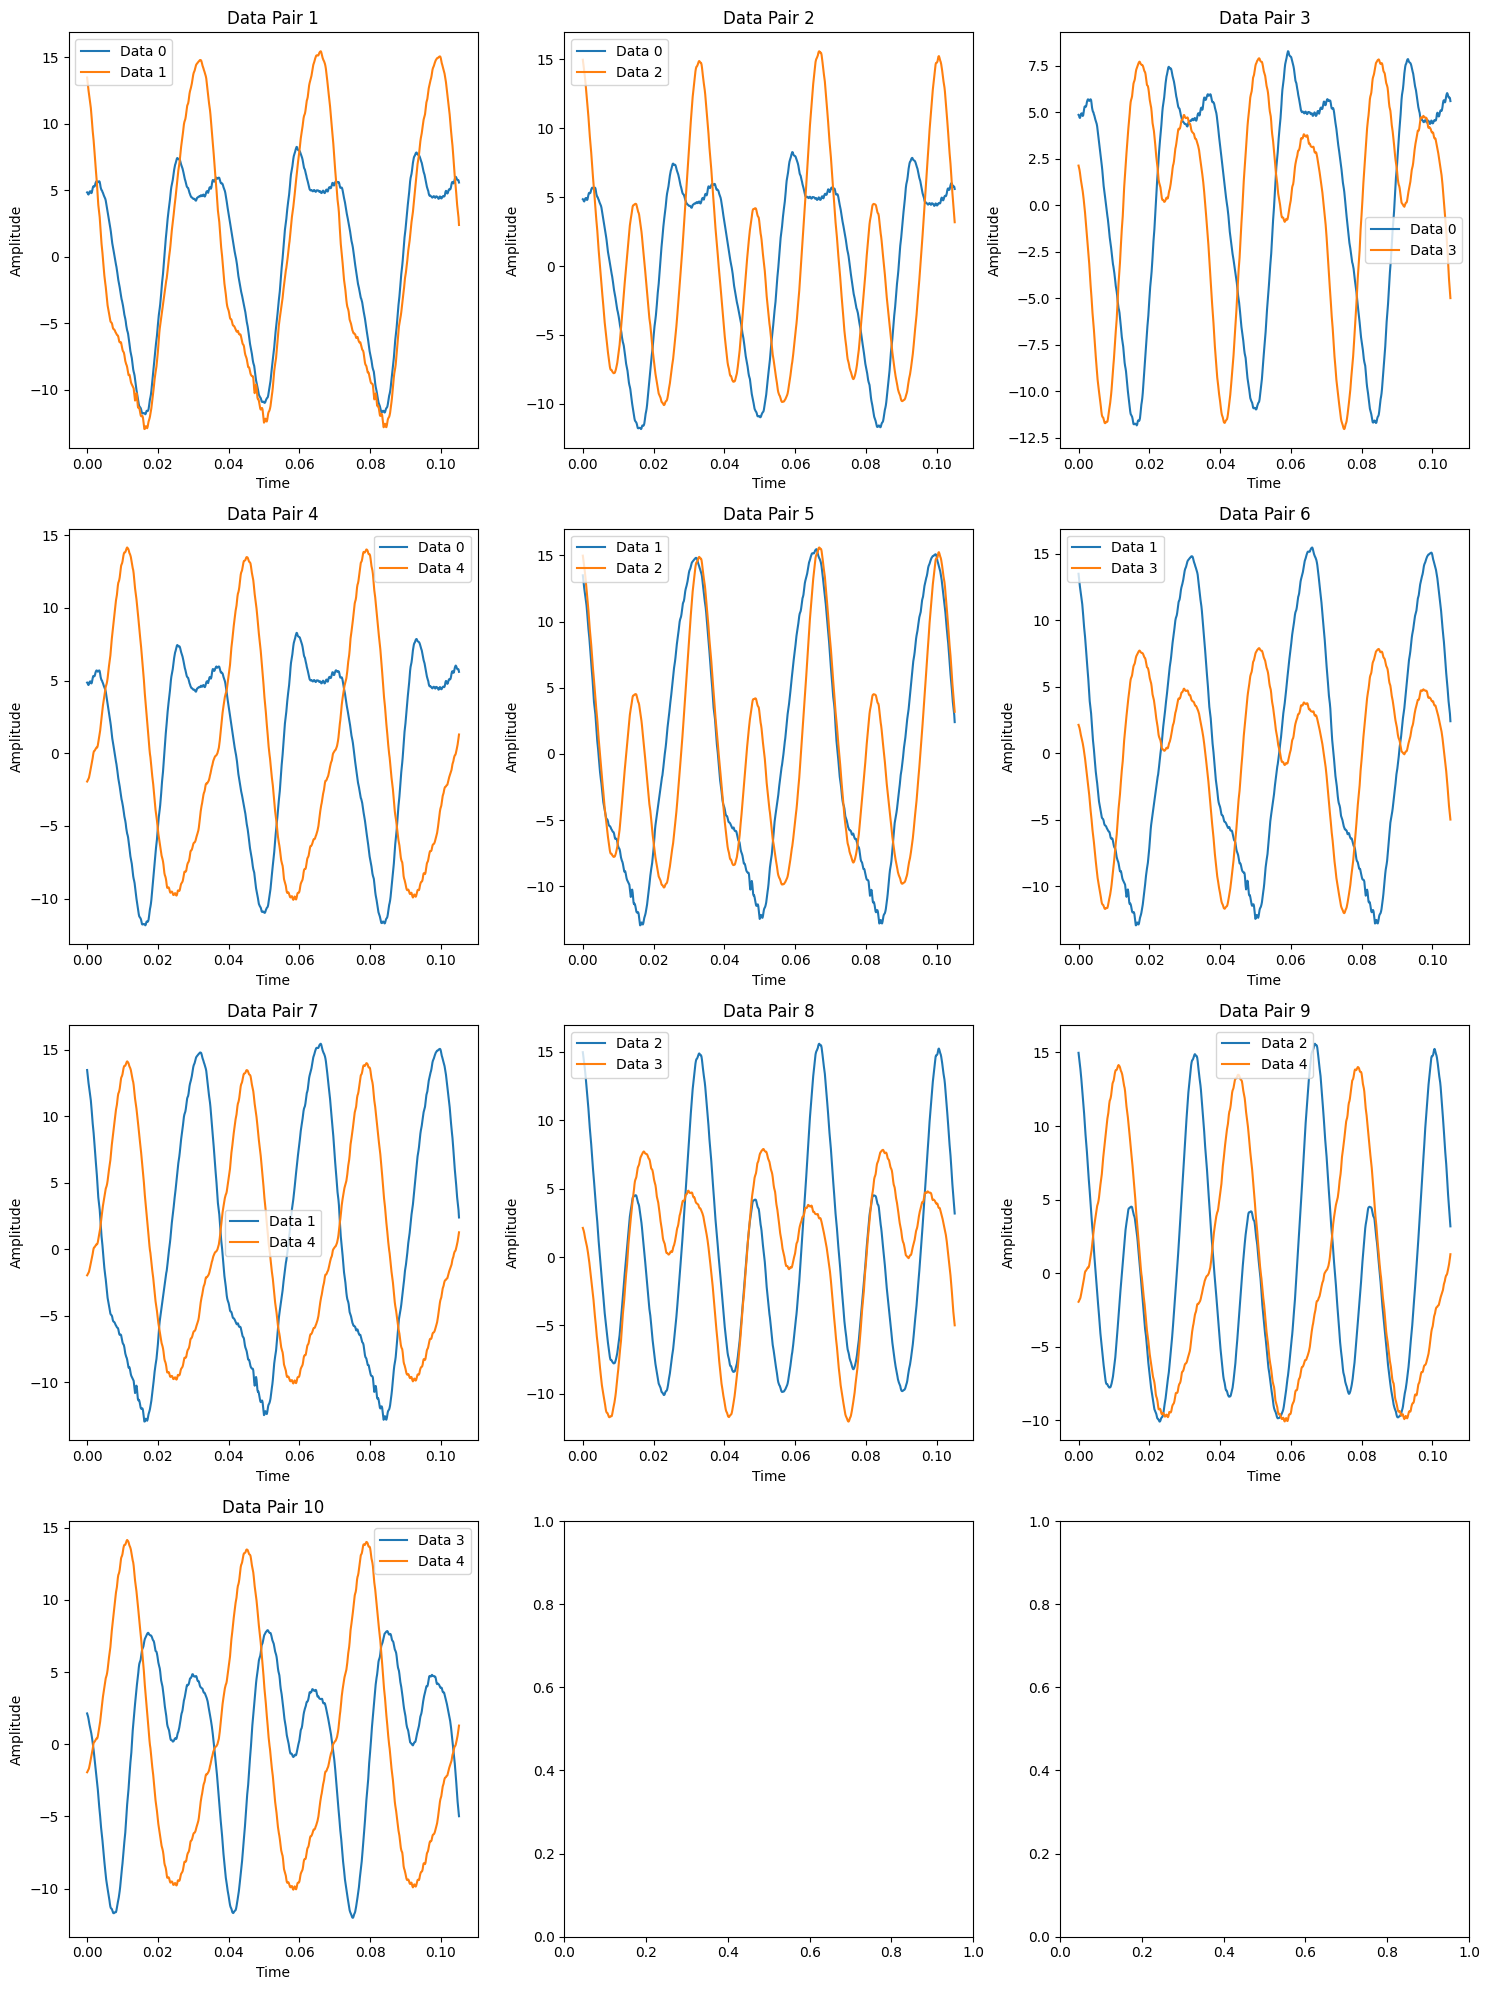

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

# Generate all possible pairs of data using combinations
data_pairs = list(combinations(enumerate(all_data), 2))

# Define the number of columns for subplots
num_cols = 3  # You can adjust this number based on how many plots you want in each row

# Calculate the number of rows required
num_rows = len(data_pairs) // num_cols
if len(data_pairs) % num_cols != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # You can adjust the figure size if needed

# Loop through the data pairs and plot the data
for idx, ((idx1, data_pair1), (idx2, data_pair2)) in enumerate(data_pairs):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx]

    # Get data for the current pair
    ord_n1 = data_pair1
    ord_n2 = data_pair2

    t = np.arange(0, 0.1051315411, 0.0001315789)

    # Plot the data for the current pair with real indices
    ax.plot(t, ord_n1, label=f'Data {idx1}')  # Use real index in label
    ax.plot(t, ord_n2, label=f'Data {idx2}')  # Use real index in label

    # Add labels and legend
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Data Pair {idx + 1}')  # Indexing starts from 1
    ax.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


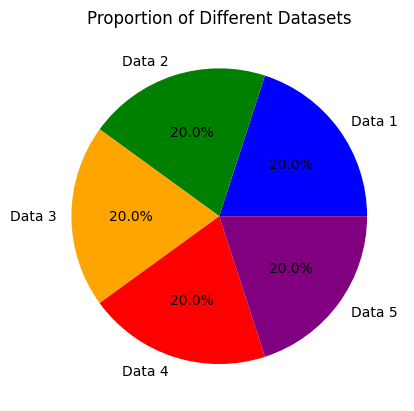

In [ ]:
import matplotlib.pyplot as plt


# Calculate the number of elements in each dataset
data_counts = [len(data) for data in all_data]

# Labels for the pie chart
labels = ["Data 1", "Data 2", "Data 3", "Data 4", "Data 5"]

# Colors for the pie sectors
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Create a pie chart
plt.pie(data_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Different Datasets')
plt.show()


In [ ]:
import numpy as np

# Créer la matrice y
y = np.repeat(np.arange(5), 8000)

# Vérifier les dimensions de y
print(y.shape)
y

(40000,)


array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
import pandas as pd
import numpy as np

y = np.repeat(np.arange(5), 8000)[:, np.newaxis]
df = pd.DataFrame(y, columns=['Y'])

df

,Y
0,0
1,0
2,0
3,0
4,0
...,...
39995,4
39996,4
39997,4
39998,4


In [ ]:
# Concatenate the datasets vertically (along rows), while filling NaN values with zeros
combined_data = pd.concat([Data,Data1b, Data2b,Data3b,Data4b], ignore_index=True)

# Verify the shape of the concatenated dataset
print("Shape of the combined dataset:", combined_data.shape)


Shape of the combined dataset: (40000, 800)


In [ ]:
combined_data.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-8.5785,-8.2703,-7.9681,-7.6172,-7.2601,-6.9061,-6.5552,-6.2469,-5.9204,-5.5267,...,-2.3499,-1.9745,-1.6205,-1.2238,-0.76904,-0.31433,0.088501,0.44861,0.74768,1.1078
1,1.5198,2.0050,2.4536,2.7771,3.0762,3.3539,3.6591,4.0039,4.3732,4.6875,...,7.6996,7.9254,8.1024,8.2092,8.25200,8.26110,8.261100,8.25200,8.28250,8.2642
2,8.2245,8.1207,7.9529,7.8156,7.7606,7.6508,7.4615,7.2052,6.9550,6.7810,...,5.0598,4.9469,4.8187,4.7119,4.60820,4.55020,4.434200,4.36100,4.23280,4.1504
3,4.0924,4.1107,4.1412,4.1168,4.0558,4.0436,4.0955,4.1779,4.2542,4.2969,...,4.4250,4.5044,4.5807,4.6234,4.60510,4.54410,4.556300,4.58070,4.69060,4.7943
4,4.8553,4.8218,4.7211,4.6906,4.7638,4.8859,4.9316,4.9408,4.8431,4.7974,...,5.8685,5.9723,6.0272,5.9814,5.88680,5.80440,5.777000,5.78920,5.75870,5.5969


In [ ]:
from sklearn.model_selection import train_test_split

# Supposons que 'data' est votre DataFrame
# Remplacez 'data' par le nom de votre DataFrame

# Divisez les données en 70% d'entraînement et 30% de test/validation (15% de chaque)
train_data, temp_data,y_train, y_temp = train_test_split(combined_data,y, test_size=0.3, random_state=42)

# Divisez le reste (30%) en 50% de validation et 50% de test
validation_data, test_data,y_validation,y_test = train_test_split(temp_data,y_temp, test_size=0.5, random_state=42)

# Maintenant, vous avez 'train_data' pour l'entraînement, 'validation_data' pour la validation et 'test_data' pour les tests
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)
print(y_train.shape)

print(y_validation.shape)



(28000, 800)
(6000, 800)
(6000, 800)
(28000, 1)
(6000, 1)


In [ ]:
print(y_test)

[[3]
 [1]
 [1]
 ...
 [1]
 [4]
 [3]]


In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
38015,-8.97220,-8.81960,-8.77380,-8.718900,-8.70670,-8.75850,-8.7982,-8.6884,-8.4045,-8.0505,...,-9.3140,-9.2712,-9.1797,-9.1339,-9.2041,-9.3628,-9.4727,-9.3964,-9.2255,-9.07900
2281,-2.34380,-2.76180,-3.20740,-3.674300,-4.12900,-4.58370,-5.0385,-5.4688,-5.9265,-6.3568,...,-7.3059,-7.6691,-8.0505,-8.4259,-8.8226,-9.1766,-9.5612,-9.8755,-10.2390,-10.52900
36629,-0.21667,-0.79956,-1.38550,-1.904300,-2.33150,-2.73740,-3.0914,-3.4607,-3.8361,-4.1901,...,-2.9938,-3.2593,-3.6011,-4.0039,-4.3579,-4.6112,-4.7943,-5.0079,-5.2368,-5.47490
6087,-5.93570,-5.88680,-5.86850,-5.789200,-5.68540,-5.58780,-5.5786,-5.5573,-5.5145,-5.4047,...,-5.9845,-5.8777,-5.8533,-5.8533,-5.8746,-5.8624,-5.7465,-5.6427,-5.5328,-5.46260
11792,2.49330,2.92360,3.44850,3.909300,4.27550,4.55930,4.8676,5.2277,5.5817,5.8777,...,5.7312,5.9601,6.1188,6.2408,6.2897,6.3202,6.3904,6.4636,6.5125,6.50330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-5.26120,-5.36190,-5.46880,-5.535900,-5.60910,-5.69150,-5.8319,-6.0089,-6.0852,-6.1493,...,-5.8685,-5.8868,-5.9021,-5.8685,-5.9235,-6.0150,-6.1584,-6.2927,-6.5125,-6.72610
11284,-10.43700,-10.37900,-10.33600,-10.236000,-10.10400,-9.95790,-9.8480,-9.7809,-9.7443,-9.6741,...,-10.0100,-9.8572,-9.7260,-9.5856,-9.3567,-9.0912,-8.8806,-8.7006,-8.4656,-8.16350
38158,0.47607,0.22278,0.11292,-0.018311,-0.28687,-0.72327,-1.2024,-1.6174,-1.9379,-2.2369,...,3.2532,2.9816,2.6917,2.4506,2.2247,1.9684,1.6907,1.4801,1.2085,0.81482
860,5.47490,5.46880,5.45040,5.447400,5.43520,5.36800,5.3375,5.3314,5.3558,5.3925,...,5.1666,5.1453,5.1239,5.1117,5.0842,5.0354,5.0323,5.1300,5.3101,5.47490


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Créez un MinMaxScaler
scaler = MinMaxScaler()

# Normalisez les données d'entraînement
train_data_normalized = scaler.fit_transform(train_data)

# Normalisez les données de validation
validation_data_normalized = scaler.transform(validation_data)

# Normalisez les données de test
test_data_normalized = scaler.transform(test_data)


In [ ]:
print(train_data_normalized.shape)

(28000, 800)


###**Autoencoder**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model  # Import the Model class from keras.models
from tensorflow.keras import layers

class SignalEncoder(Model):
    def __init__(self, input_dim):
        super(SignalEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(input_dim,)),  # Spécifiez le nombre de colonnes en entrée
            layers.Dense(400, activation="relu"),
            layers.Dense(100, activation="relu"),
            layers.Dense(50, activation="relu")
        ])

        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(50,)),  # Spécifiez la taille de la sortie de l'encodeur
            layers.Dense(100, activation="relu"),
            layers.Dense(400, activation="relu"),
            layers.Dense(input_dim, activation="sigmoid")  # Utilisez 'input_dim' pour la sortie
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Créez une instance du modèle en spécifiant le nombre de colonnes (input_dim)
input_dim = 800
autoencoder = SignalEncoder(input_dim)

# Compilez le modèle avec l'optimiseur 'adam' et la fonction de perte 'mae'
autoencoder.compile(optimizer='adam', loss='mae')


In [ ]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

# Entraînez l'autoencodeur
history = autoencoder.fit(train_data_normalized, train_data_normalized,
          epochs=20,
          batch_size=512,
          validation_data=(validation_data_normalized, validation_data_normalized),
          shuffle=True)

Epoch 1/20
55/55 [==============================] - 4s 56ms/step - loss: 0.0956 - val_loss: 0.0668
Epoch 2/20
55/55 [==============================] - 3s 50ms/step - loss: 0.0482 - val_loss: 0.0336
Epoch 3/20
55/55 [==============================] - 4s 69ms/step - loss: 0.0255 - val_loss: 0.0229
Epoch 4/20
55/55 [==============================] - 5s 84ms/step - loss: 0.0219 - val_loss: 0.0210
Epoch 5/20
55/55 [==============================] - 3s 57ms/step - loss: 0.0207 - val_loss: 0.0194
Epoch 6/20
55/55 [==============================] - 3s 49ms/step - loss: 0.0200 - val_loss: 0.0203
Epoch 7/20
55/55 [==============================] - 3s 50ms/step - loss: 0.0194 - val_loss: 0.0190
Epoch 8/20
55/55 [==============================] - 3s 57ms/step - loss: 0.0190 - val_loss: 0.0185
Epoch 9/20
55/55 [==============================] - 5s 83ms/step - loss: 0.0186 - val_loss: 0.0175
Epoch 10/20
55/55 [==============================] - 4s 70ms/step - loss: 0.0181 - val_loss: 0.0185
Epoch 11/

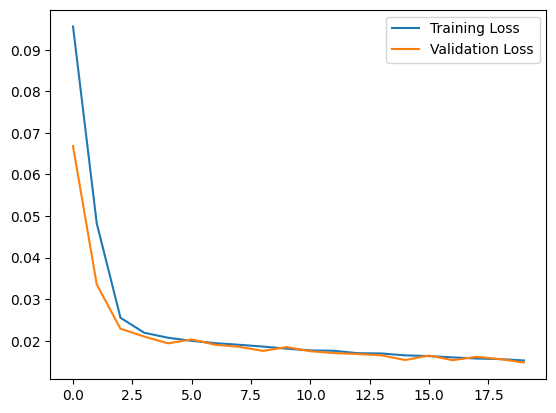

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

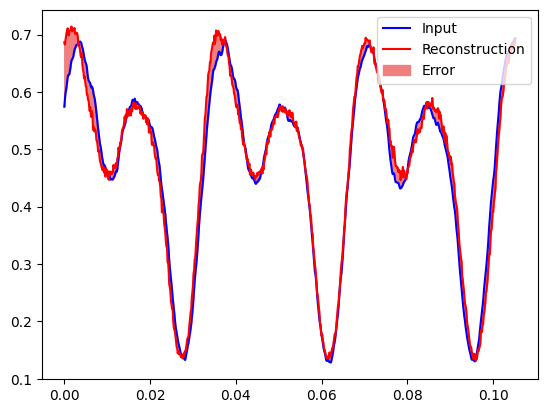

In [ ]:
# Compute the absolute difference between decoded data and test data
encoded_data = autoencoder.encoder(test_data_normalized).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()
t = np.arange(0, 0.1051315411, 0.0001315789)
plt.plot(t,test_data_normalized[0], 'b')
plt.plot(t,decoded_data[0], 'r')
plt.fill_between(t, decoded_data[0], test_data_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


In [ ]:
autoencoder.save('/content/drive/MyDrive/modelsPm/autoencoder_model', save_format='tf')

In [ ]:
normalized_data0 = scaler.transform(Data)

In [ ]:
from tensorflow.keras.models import load_model


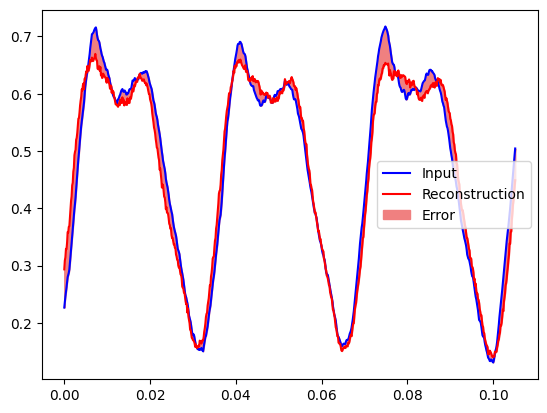

In [ ]:
loaded_autoencoder = load_model('/content/drive/MyDrive/modelsPm/autoencoder_model')
encoded_data = loaded_autoencoder.encoder(normalized_data0).numpy()
decoded_data = loaded_autoencoder.decoder(encoded_data).numpy()
t = np.arange(0, 0.1051315411, 0.0001315789)
plt.plot(t,normalized_data0[0], 'b')
plt.plot(t,decoded_data[0], 'r')
plt.fill_between(t, decoded_data[0], normalized_data0[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


In [ ]:
normalized_data1 = scaler.transform(Data1b)
normalized_data2 = scaler.transform(Data2b)
normalized_data3 = scaler.transform(Data3b)
normalized_data4 = scaler.transform(Data4b)

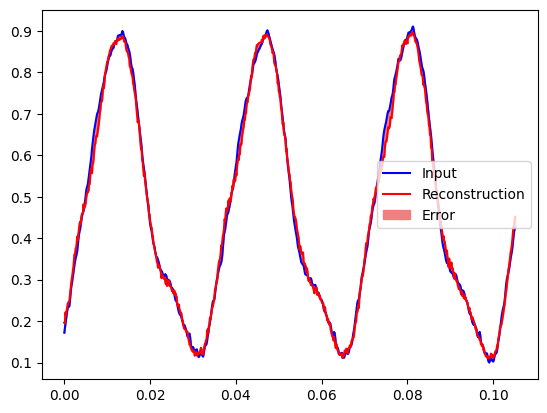

In [ ]:
encoded_data1 = loaded_autoencoder.encoder(normalized_data1).numpy()
decoded_data = loaded_autoencoder.decoder(encoded_data1).numpy()
t = np.arange(0, 0.1051315411, 0.0001315789)
plt.plot(t,normalized_data1[0], 'b')
plt.plot(t,decoded_data[0], 'r')
plt.fill_between(t, decoded_data[0], normalized_data1[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

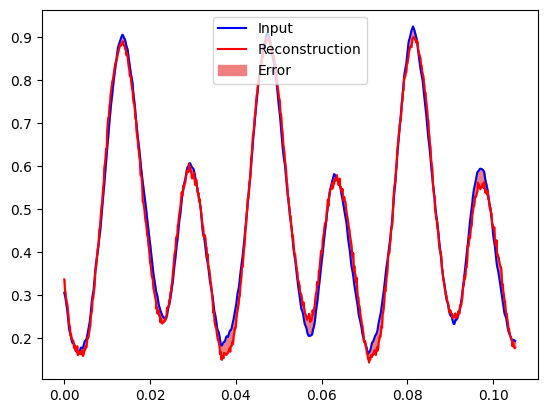

In [ ]:
encoded_data2 = loaded_autoencoder.encoder(normalized_data2).numpy()
decoded_data = loaded_autoencoder.decoder(encoded_data2).numpy()
t = np.arange(0, 0.1051315411, 0.0001315789)
plt.plot(t,normalized_data2[0], 'b')
plt.plot(t,decoded_data[0], 'r')
plt.fill_between(t, decoded_data[0], normalized_data2[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

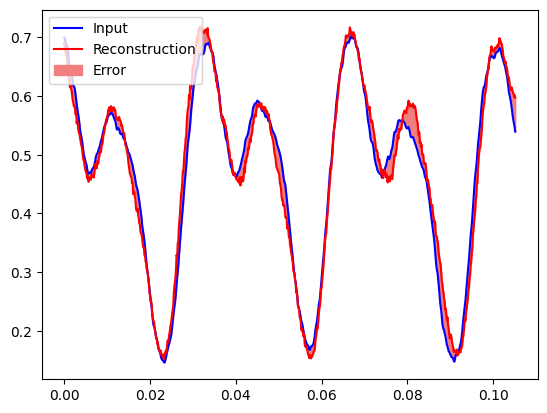

In [ ]:
encoded_data = loaded_autoencoder.encoder(normalized_data3).numpy()
decoded_data = loaded_autoencoder.decoder(encoded_data).numpy()
t = np.arange(0, 0.1051315411, 0.0001315789)
plt.plot(t,normalized_data3[0], 'b')
plt.plot(t,decoded_data[0], 'r')
plt.fill_between(t, decoded_data[0], normalized_data3[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

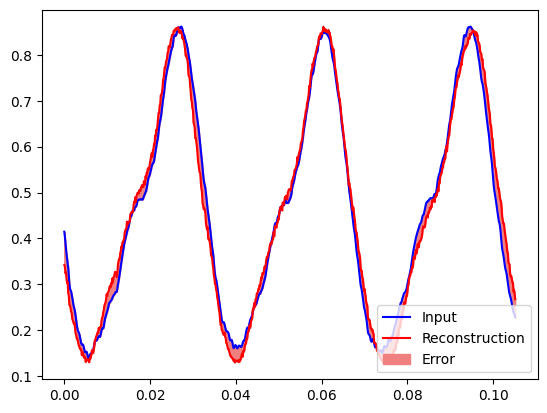

In [ ]:
encoded_data = loaded_autoencoder.encoder(normalized_data4).numpy()
decoded_data = loaded_autoencoder.decoder(encoded_data).numpy()
t = np.arange(0, 0.1051315411, 0.0001315789)
plt.plot(t,normalized_data4[0], 'b')
plt.plot(t,decoded_data[0], 'r')
plt.fill_between(t, decoded_data[0], normalized_data4[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

188/188 [==============================] - 1s 5ms/step


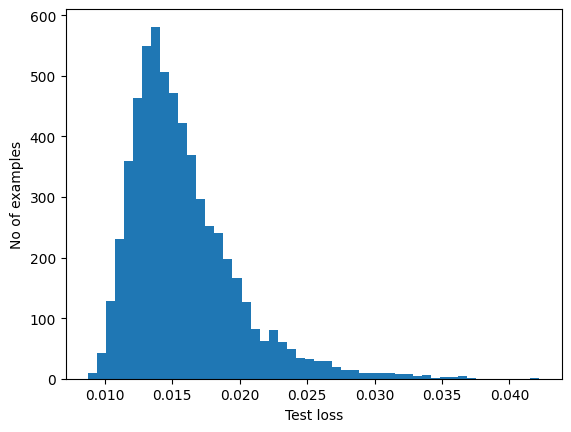

Mean reconstraction error:  0.01583406698795153


In [ ]:
reconstructions = autoencoder.predict(test_data_normalized)
test_loss = tf.keras.losses.mae(reconstructions, test_data_normalized)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()
print("Mean reconstraction error: ", np.mean(test_loss))

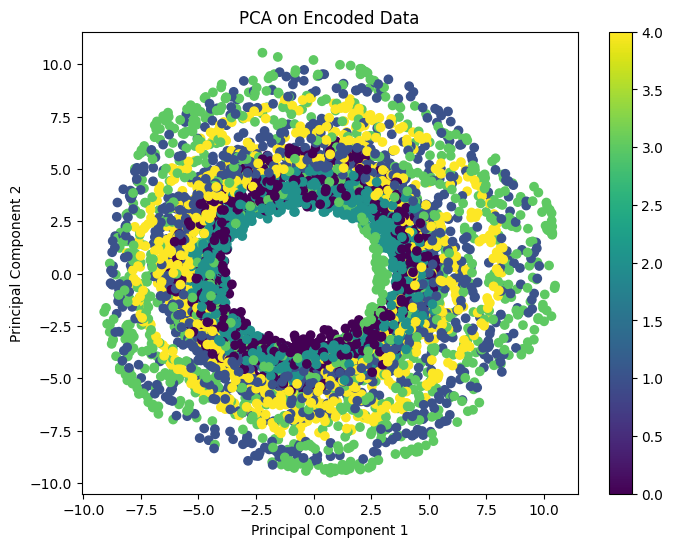

[ 1.9058623   2.4235537  -6.0177975  ...  6.0340066   0.71908534
  2.3104465 ]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
autoencoder=load_model('/content/drive/MyDrive/modelsPm/autoencoder_model')
test_encoded_data = autoencoder.encoder(test_data_normalized).numpy()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(test_encoded_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_test )
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Encoded Data')
plt.show()
print(pca_result[:, 0])

188/188 [==============================] - 1s 3ms/step


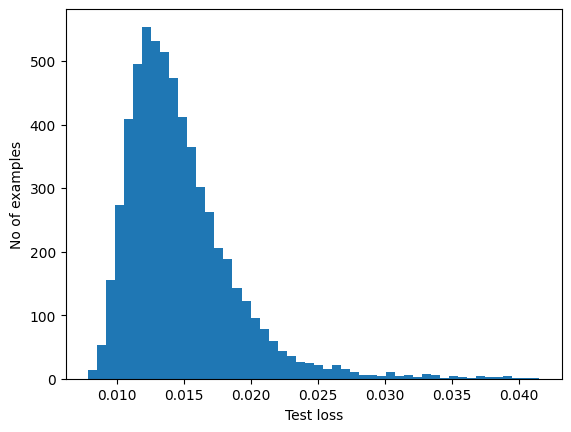

Mean reconstraction error:  0.014761212650740912


In [ ]:
x_r_validation = autoencoder.predict(validation_data_normalized)
test_loss = tf.keras.losses.mae(x_r_validation, validation_data_normalized)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()
print("Mean reconstraction error: ", np.mean(test_loss))

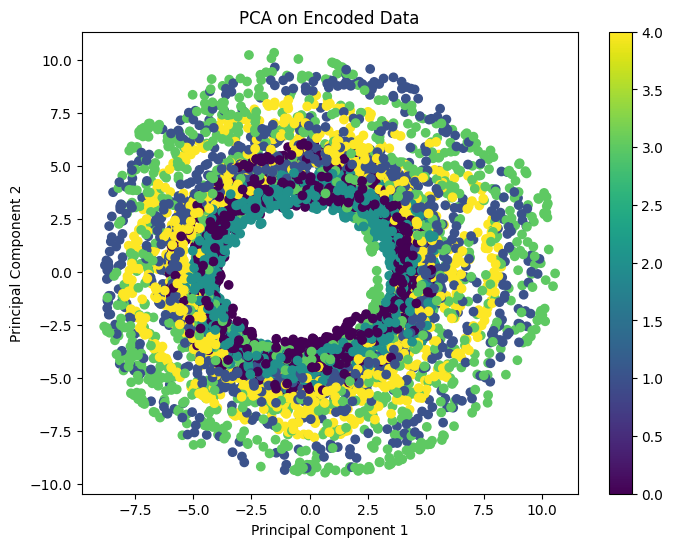

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
validation_encoded_data = autoencoder.encoder(validation_data_normalized).numpy()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(validation_encoded_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_validation)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Encoded Data')
plt.show()

875/875 [==============================] - 5s 5ms/step


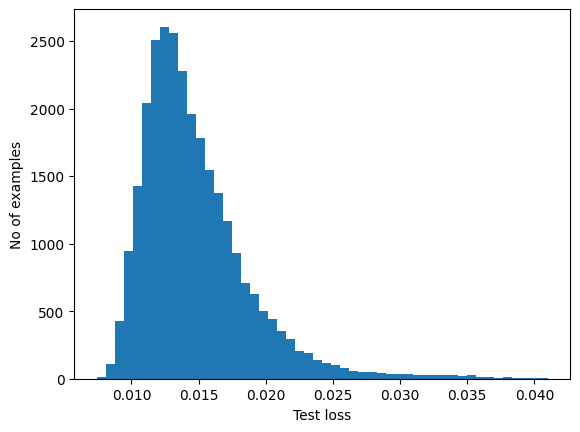

Mean reconstraction error:  0.014769471107187607


In [ ]:
x_r_train = autoencoder.predict(train_data_normalized)
test_loss = tf.keras.losses.mae(x_r_train, train_data_normalized)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()
print("Mean reconstraction error: ", np.mean(test_loss))

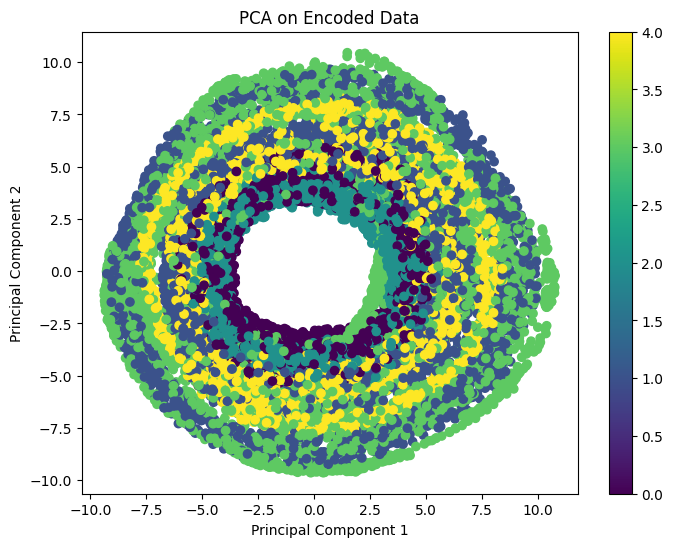

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
autoencoder=load_model('/content/drive/MyDrive/modelsPm/autoencoder_model')
train_encoded_data = autoencoder.encoder(train_data_normalized).numpy()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_encoded_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Encoded Data')
plt.show()

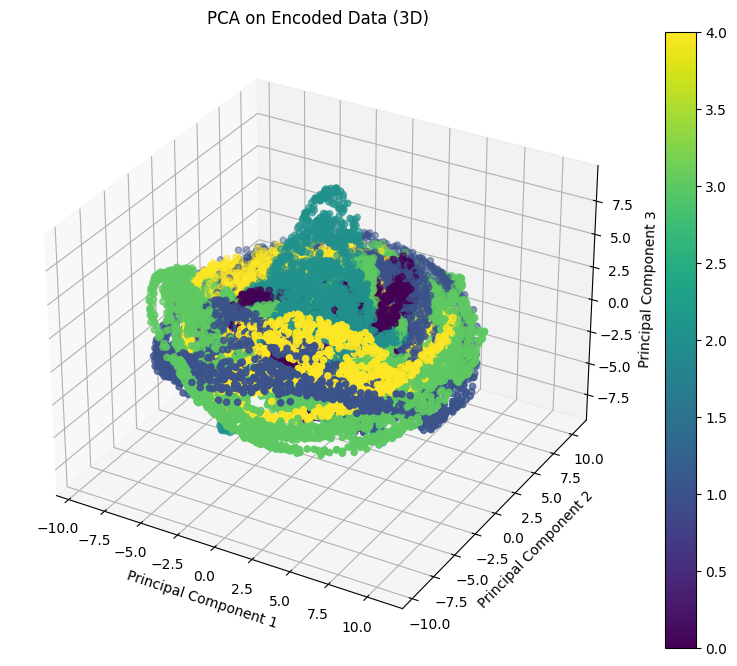

In [ ]:
# Créer une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_encoded_data)
# Tracé en 3D
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=y_train, cmap='viridis')

# Ajout d'une barre de couleur
plt.colorbar(scatter)

# Étiquetage des axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA on Encoded Data (3D)')

# Afficher le graphique
plt.show()

#Grid Search with SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")

In [ ]:
for i in range(2):
    # Separate data into test and training sets
    svclassifier = getClassifier(i)
    svclassifier.fit(train_encoded_data, y_train)# Make prediction
    y_pred = svclassifier.predict(test_encoded_data)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1243
           1       1.00      1.00      1.00      1198
           2       1.00      1.00      1.00      1164
           3       1.00      1.00      1.00      1199
           4       1.00      1.00      1.00      1196

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.99      0.99      0.99      1198
           2       1.00      1.00      1.00      1164
           3       1.00      0.99      1.00      1199
           4       1.00      0.99      0.99      1196

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(train_encoded_data,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.2min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.3min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  22.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  27.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  24.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  30.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  25.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  25.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  23.6s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [ ]:
grid_predictions = grid.predict(test_encoded_data)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[1243    0    0    0    0]
 [   0 1198    0    0    0]
 [   0    0 1164    0    0]
 [   0    0    0 1199    0]
 [   0    0    0    0 1196]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1243
           1       1.00      1.00      1.00      1198
           2       1.00      1.00      1.00      1164
           3       1.00      1.00      1.00      1199
           4       1.00      1.00      1.00      1196

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [ ]:
import joblib

In [ ]:
joblib.dump(grid,'/content/drive/MyDrive/modelsPm/svm_model.pkl')

NameError: ignored

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/modelsPm/svm_model.pkl')

#Grid Search with Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Définir le modèle d'arbre de décision pour une classification multiclasse
tree_classifier = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search

# Définir la grille de paramètres à rechercher
tree_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Créer un objet GridSearchCV pour la recherche des hyperparamètres
tree_cv = GridSearchCV(tree_classifier, tree_grid, cv=5)

# Ajuster le modèle aux données d'entraînement
tree_cv.fit(train_encoded_data, y_train)

# Afficher les meilleurs hyperparamètres et la précision correspondante
print("Meilleurs hyperparamètres :", tree_cv.best_params_)
print("Meilleure précision :", tree_cv.best_score_)

# Prédire sur l'ensemble de test en utilisant le meilleur modèle
y_pred_tree = tree_cv.predict(test_encoded_data)

# Évaluer le modèle sur l'ensemble de test
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Précision sur l'ensemble de test :", accuracy_tree)

Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
Meilleure précision : 0.9436785714285716
Précision sur l'ensemble de test : 0.9561666666666667


In [ ]:
tree_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred_tree))
confusion_matrix(y_test, y_pred_tree)

0.9561666666666667


array([[1187,    7,   29,   13,    7],
       [   8, 1146,    1,    5,   38],
       [  19,    3, 1135,    5,    2],
       [  24,   14,    3, 1152,    6],
       [  13,   53,    7,    6, 1117]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_best.predict(test_encoded_data)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1243
           1       0.94      0.96      0.95      1198
           2       0.97      0.98      0.97      1164
           3       0.98      0.96      0.97      1199
           4       0.95      0.93      0.94      1196

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



In [ ]:
dt_best = tree_cv.best_estimator_

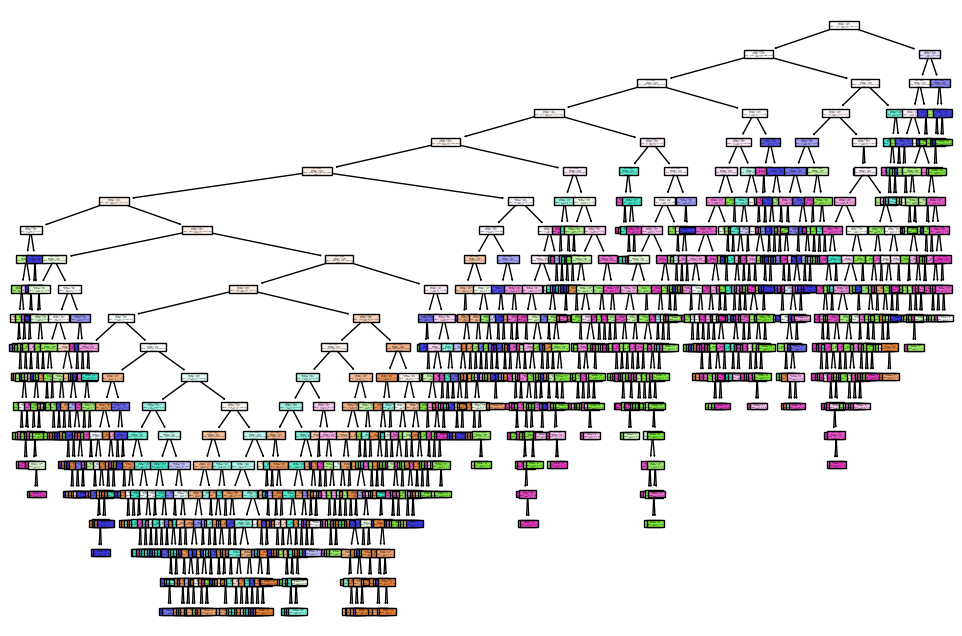

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def get_dt_graph(decision_tree_model, feature_names):
    plt.figure(figsize=(12, 8))
    plot_tree(decision_tree_model, filled=True, feature_names=feature_names, class_names=[str(i) for i in decision_tree_model.classes_])
    plt.show()
import pandas as pd

# Assuming dt_best is the best decision tree model from your GridSearchCV
train_encoded_data_df = pd.DataFrame(train_encoded_data)
get_dt_graph(dt_best, feature_names=train_encoded_data_df.columns)
# Assuming dt_best is the best decision tree model from your GridSearchCV

#Grid Search with Logistic Regression


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler




scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_encoded_data)

y_train = y_train.ravel()

# Redefine the parameter grid with a broader range
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}

# Create a new GridSearchCV object
logreg_cv = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000), grid, cv=5)

# Fit the model to the training data
logreg_cv.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", logreg_cv.best_params_)
print("Best accuracy:", logreg_cv.best_score_)



Best hyperparameters: {'C': 100.0, 'penalty': 'l2'}
Best accuracy: 0.541607142857143


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Prédire sur l'ensemble de test en utilisant le meilleur modèle
y_pred =  logreg_cv.predict(test_encoded_data)
y_test = y_test.ravel()
# Évaluer le modèle sur l'ensemble de test
accuracy_logist = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test :", accuracy_logist)
confusion_matrix(y_test, y_pred)

Précision sur l'ensemble de test : 0.207


array([[   0,    0, 1243,    0,    0],
       [   0,  113, 1085,    0,    0],
       [   0,   35, 1129,    0,    0],
       [   0,  151, 1048,    0,    0],
       [   0,   88, 1108,    0,    0]])

In [ ]:
from sklearn.metrics import classification_report
logist_best = logreg_cv.best_estimator_
print(classification_report(y_test, logist_best.predict(test_encoded_data)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1243
           1       0.29      0.09      0.14      1198
           2       0.20      0.97      0.33      1164
           3       0.00      0.00      0.00      1199
           4       0.00      0.00      0.00      1196

    accuracy                           0.21      6000
   macro avg       0.10      0.21      0.10      6000
weighted avg       0.10      0.21      0.09      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**VAE**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model  # Import the Model class from keras.models
from tensorflow.keras import layers

from keras import backend as K
import tensorflow as tf
from keras import layers

In [ ]:
class Sampling(keras.layers.Layer):
  def call(self, inputs):
    mean, log_var = inputs
    return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [ ]:
codings_size = 50
inputs = keras.layers.Input(shape=[800])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(400, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z) # μ
codings_log_var = keras.layers.Dense(codings_size)(z) # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(
inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [ ]:
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(400, activation="selu")(x)
x = keras.layers.Dense(800, activation="sigmoid")(x)
outputs = keras.layers.Reshape([800])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [ ]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

In [ ]:
latent_loss = -0.5 * K.sum(
1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
history = variational_ae.fit(train_data_normalized, train_data_normalized, epochs=50, batch_size=512,
validation_data=[validation_data_normalized, validation_data_normalized])

Epoch 1/50
55/55 [==============================] - 41s 81ms/step - loss: 0.7437 - val_loss: 0.6918
Epoch 2/50
55/55 [==============================] - 6s 113ms/step - loss: 0.6767 - val_loss: 0.6678
Epoch 3/50
55/55 [==============================] - 4s 67ms/step - loss: 0.6612 - val_loss: 0.6549
Epoch 4/50
55/55 [==============================] - 4s 69ms/step - loss: 0.6561 - val_loss: 0.6519
Epoch 5/50
55/55 [==============================] - 4s 80ms/step - loss: 0.6509 - val_loss: 0.6477
Epoch 6/50
55/55 [==============================] - 6s 108ms/step - loss: 0.6470 - val_loss: 0.6464
Epoch 7/50
55/55 [==============================] - 4s 68ms/step - loss: 0.6448 - val_loss: 0.6431
Epoch 8/50
55/55 [==============================] - 4s 67ms/step - loss: 0.6427 - val_loss: 0.6422
Epoch 9/50
55/55 [==============================] - 5s 85ms/step - loss: 0.6410 - val_loss: 0.6425
Epoch 10/50
55/55 [==============================] - 6s 103ms/step - loss: 0.6396 - val_loss: 0.6377
Epoch

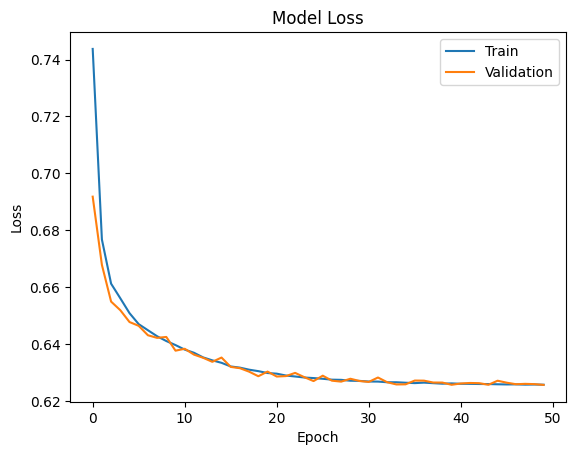

In [ ]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

188/188 [==============================] - 1s 3ms/step


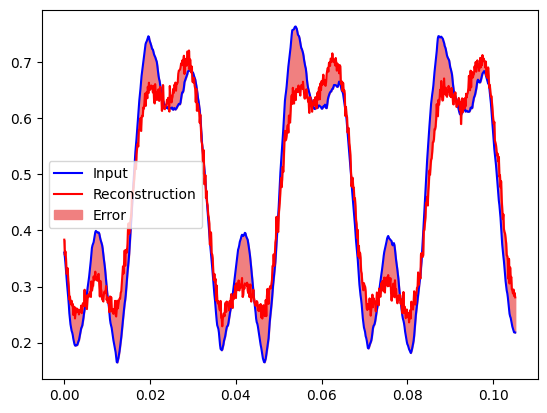

In [ ]:

# Use the encoder to obtain the latent representation
a = variational_encoder.predict(test_data_normalized)
b=variational_decoder.predict(a[2])
# Assuming 'a' contains the output of the encoder

# Plotting code
t = np.arange(0, 0.1051315411, 0.0001315789)
plt.plot(t, test_data_normalized[5], 'b')
plt.plot(t, b[5], 'r')
plt.fill_between(t, b[5], test_data_normalized[5], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()
